 [-----------------100%-----------------] 40000 of 40000 complete in 2.1 sec

c:\users\i520921\appdata\local\continuum\anaconda3\envs\pp\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


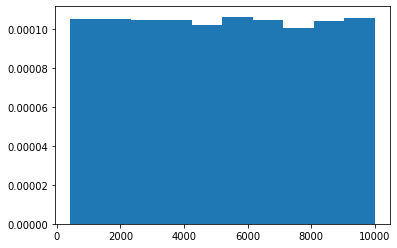

In [185]:
import numpy as np
import pymc as pm
from matplotlib import pyplot as plt

@pm.deterministic
def noOfCompanies(N=N,alpha=alpha):
    return (1/N)**alpha

true_N = 500
alpha = pm.Uniform("alpha", lower = 0.8, upper=1)
D = pm.rdiscrete_uniform(1, true_N, size = 10)
N = pm.DiscreteUniform("N", lower=D.max(), upper=10000)
observation = pm.Poisson("obs",value=noOfCompanies, observed=True)

model = pm.Model([observation, N,alpha,C])

mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

N_samples = mcmc.trace('N')[:]
# histogram of the samples:

plt.hist(N_samples, normed = True)
plt.show()
